In [12]:
# import external python libraries
import time
import os
import numpy as np
import matplotlib.pyplot as plt 


# import PyPore3D wrappers that will be used in the current notebook
import pypore3d
from pypore3d import *
from pypore3d.p3dFiltPy import *
from pypore3d.p3dBlobPy import *
from pypore3d.p3dSkelPy import *

from poreUtils import *

In [3]:
data_dir = 'D:\\sagar\\Data\\MD_1264_A1_1_Z3.3mm\\selected_roi\\'


In [4]:
raw_file = os.path.join(data_dir, '0-300x1200-1500x2000-2300_8bit.raw')

In [5]:
x = 300
y = 300
z = 300

volObj = py_p3dReadRaw8(raw_file, dimx=x, dimy=y, dimz=z)

Success. 



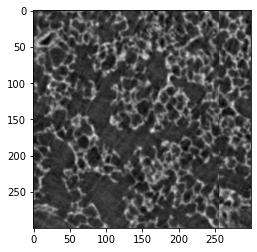

In [6]:
# Visualize a slice of the loaded volume  
vol = swigObjt2uint8Array(volObj, x, y, z, plot=True)


Success. 



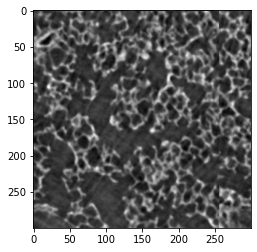

In [7]:
# Compute Median

#start = time.time()
med_volObj = py_p3dMedianFilter8(volObj, x, y, z, width = 3)

# Visualize a slice after applying the median filter   
med_vol = swigObjt2uint8Array(med_volObj, x, y, z, plot=True)


Success. 



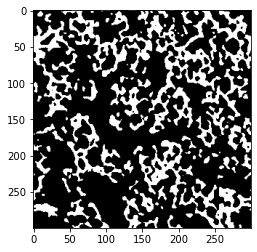

In [8]:
# Apply autothresholding (Otsu)
th_volObj = py_p3dAutoThresholding8(med_volObj, x, y, z, methodNum = 2,) # methodNum 2 = Otsu
# Visualize a slice after applying the median filter   
th_vol = swigObjt2uint8Array(th_volObj, x, y, z, plot=True)


In [9]:
basic_stats = py_p3dBasicAnalysis(th_volObj, x, y, z, resolution=0.002)
anisotropy_stats = py_p3dAnisotropyAnalysis(th_volObj, x, y, z, resolution=0.002)

Success. 

Success. 



In [10]:
basic_stats.Cv
anisotropy_stats.E

0.052682353561170125

In [11]:
# Blob Analysis 
stat_file = data_dir+"\\blob_test.txt"
blob_stat =  py_p3dBlobAnalysis(th_volObj, x,y,z, resolution = 0.002, conn = 26,blob_analysis_file=stat_file)

Success. 



In [18]:
# Skeletonization 
sklObj = py_p3dLKCSkeletonization(th_volObj, x, y, z)



Success. 



In [24]:
PSkeletonStats = tuple()

py_p3dSkeletonAnalysis(th_volObj, sklObj, PSkeletonStats, x,y,z, resolution = 0.002)

NameError: name 'PSkeletonStats' is not defined

In [25]:
PSkeletonStats = tuple()

In [27]:
a = PSkeletonStats()

TypeError: 'tuple' object is not callable

In [10]:
import tifffile 

In [11]:
tifffile.imsave('th_vol.raw', th_vol)

In [6]:


# Apply autothresholding (Otsu)

outImg= py_p3dAutoThresholding8(outImg, 300,300,dimz = 300,methodNum = 2)
#invert (if needed)
#invert_vol(outImg, x,y,z)

# Erode, dilate
#outImg = py_p3d_Erode(outImg, x, y, dimz=z, kWidth = 1)
#outImg = py_p3d_Dilate(outImg, x, y, dimz=z, kWidth = 1)
end = time.time()
print("Filtering time: ", end - start) # print computation time if needed
####################

# write file (if needed, for example, to be for visualization or to be reused later to save computation time)
py_p3dWriteRaw8( outImg, raw_file+'_median_otsu_eroded_dilated.raw',300,300,dimz = 300) 

Success. 

Success. 

Filtering time:  1.3272457122802734
Success. 



<Swig Object of type 'unsigned char *' at 0x0000029D67EA0630>

In [28]:
raw_vol = np.array(list(v))

In [8]:
import matplotlib.pyplot as plt

In [10]:
vol_raw.shape

(300, 300, 300)

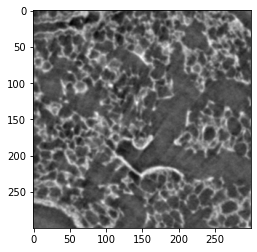

In [11]:
plt.imshow(vol_raw[1, :, :], cmap='gray')
plt.show()

In [34]:
raw_vol.dtype

dtype('uint8')

In [12]:
help("py_p3d_Erode")

No Python documentation found for 'py_p3d_Erode'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [13]:
th_volObj = py_p3dReadRaw8('th_vol.raw', x, y, z)

Success. 



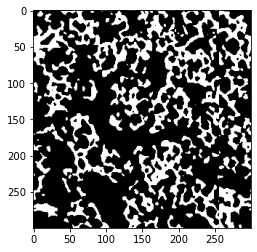

In [14]:
th_vol = swigObjt2uint8Array(th_volObj, x, y, z, plot=True)

In [15]:
th_vol.dtype

dtype('uint8')

In [17]:
th_vol = th_vol.astype(np.uint16)

In [18]:
th_vol.dtype

dtype('uint16')

In [19]:
tifffile.imsave('th_vol_uint16.raw', th_vol)

In [20]:
a = []

In [22]:
b = a()

TypeError: 'list' object is not callable